In [1]:
# Approach
# By applying Exploratory Data Analysis we will identify the relation between different attributes and evaluate meaningful information
# By applying different supervised machine learning algorithms we will predict the sales for test dataset

In [2]:
#Part 1: Data Preprocessing

import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings# warning filter

#ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('husl')

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

pd.pandas.set_option('display.max_columns',None)


In [3]:
train_dataset = pd.read_csv('../bigdatamart_Train.csv')
print(train_dataset.shape)

(8523, 12)


In [4]:
# Data exploration
train_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Display the columns
train_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Check the name of coloumns which contain string
train_dataset.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [8]:
# Check the no. of coloumns which contain string
len(train_dataset.select_dtypes(include='object').columns)

7

In [9]:
# Check the name of coloumns which contain numerical value
train_dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
# Check the no. of coloumns which contain numerical value
len(train_dataset.select_dtypes(include=['int64', 'float64']).columns)

5

In [11]:
# statistical summary
train_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
# Now lets deal with missing data
train_dataset.isnull().values.any()

True

In [13]:
train_dataset.isnull().values.sum()

3873

In [14]:
train_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
# Lets check the column with null values
train_dataset.columns[train_dataset.isnull().any()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [16]:
len(train_dataset.columns[train_dataset.isnull().any()])

2

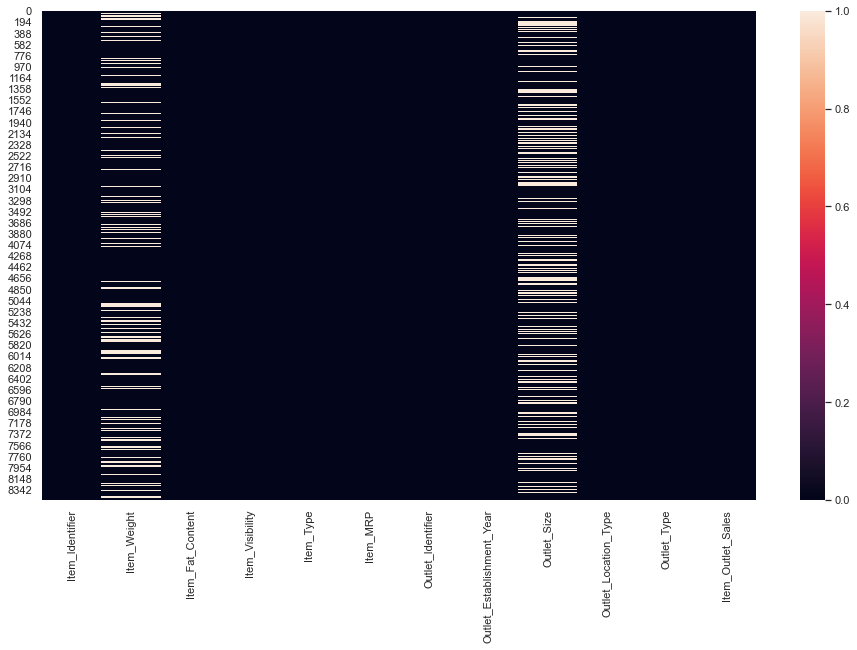

In [17]:
# null values with heatmap
plt.figure(figsize=(16,9))
sns.heatmap(train_dataset.isnull())
plt.show()

In [18]:
null_percent = train_dataset.isnull().sum() / train_dataset.shape[0] * 100

# (missing values / total values) * 100

null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<AxesSubplot:xlabel='Item_Weight'>

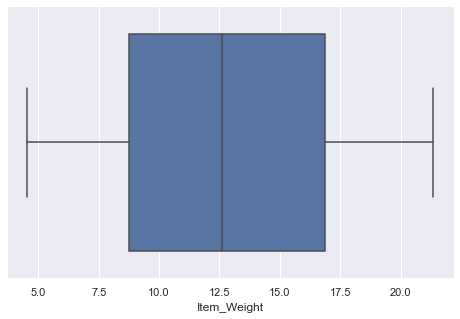

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train_dataset)

In [20]:
# The above box plot suggests that there is no outlier and hence we can change the missing values with "Mean"

In [21]:
train_dataset['Item_Weight'] = train_dataset['Item_Weight'].fillna(train_dataset['Item_Weight'].mean())

In [22]:
#Since the Outlet_Size is categorical variable, we can change missing values to Mode
train_dataset['Outlet_Size'] = train_dataset['Outlet_Size'].fillna(train_dataset['Outlet_Size'].mode()[0])
train_dataset.isnull().values.any()

False

In [23]:
len(train_dataset.columns[train_dataset.isnull().any()])

0

In [24]:
# Lets clean the data next
train_dataset['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [25]:
train_dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
# It appears that some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’. We need to fix them

train_dataset['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
train_dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
train_dataset['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [28]:
train_dataset['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [29]:
train_dataset['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [30]:
train_dataset['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [31]:
train_dataset['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [32]:
# The Outlet_Establishment_Year can be converted to Age of the store as an indicator for making our models perform better

train_dataset['Years_Established'] = train_dataset['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
train_dataset = train_dataset.drop(columns=['Outlet_Establishment_Year'])
train_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


In [33]:
# Now lets perform the EDA

# 1. Univariate Analysis
# Check the name of coloumns which contain string
train_dataset.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

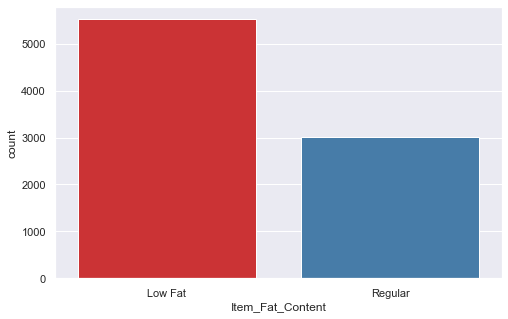

In [34]:
# Item Fat Content analysis
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train_dataset,palette='Set1')

In [35]:
# Observation from above plot.  Consumers bought more Low Fat items

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

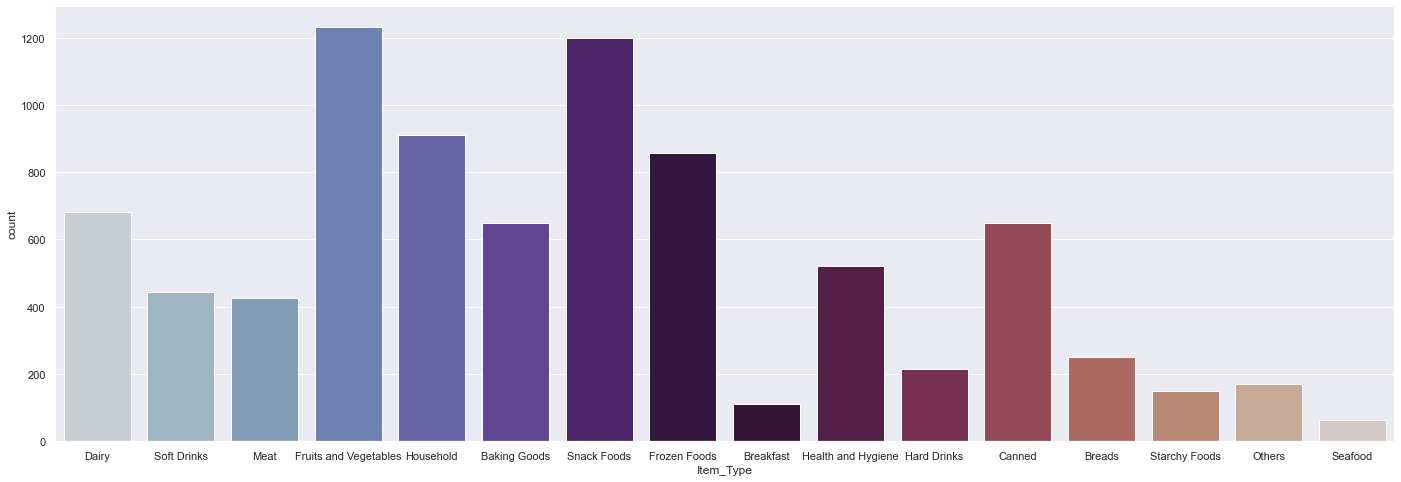

In [36]:
# Item type analysis
plt.figure(figsize=(24,8))
sns.countplot('Item_Type',data=train_dataset,palette='twilight')

In [37]:
# From the above plot, it is observed that Consumers bought more Fruits and Vegetables

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

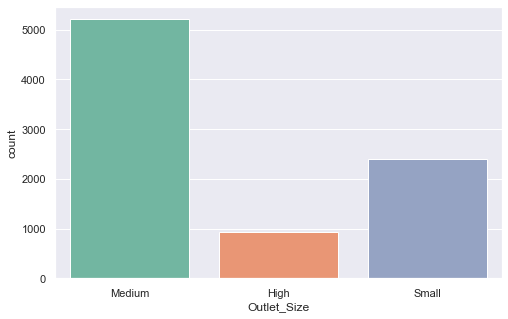

In [38]:
# Outlet Size analysis
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train_dataset,palette='Set2')

In [39]:
# From the above plot, it is observed that there are more Medium outlets

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

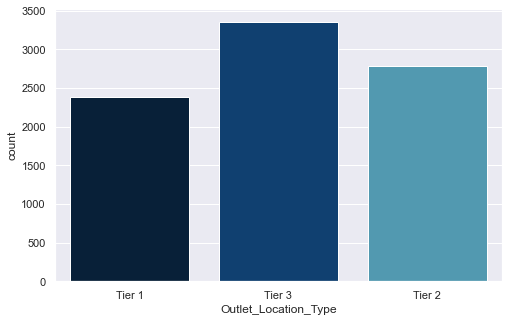

In [40]:
# Outlet location analysis
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train_dataset,palette='ocean')

In [41]:
# from the above plot, it is observed that Maximum outlets are located in Tier 3 locations

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

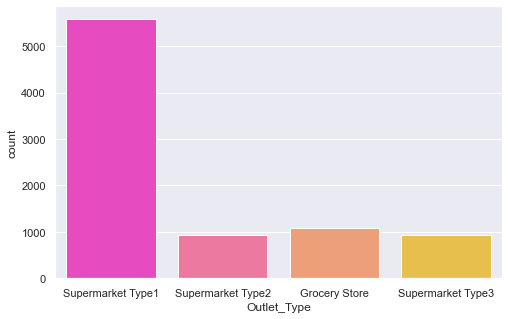

In [42]:
# Outlet Type analysis
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train_dataset,palette='spring')

In [43]:
# From the above plot, it is observed that Supermarket Type 1 are more

In [44]:
# Lets do the Bivariate analysis
# Check the name of coloumns which contain string
train_dataset.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

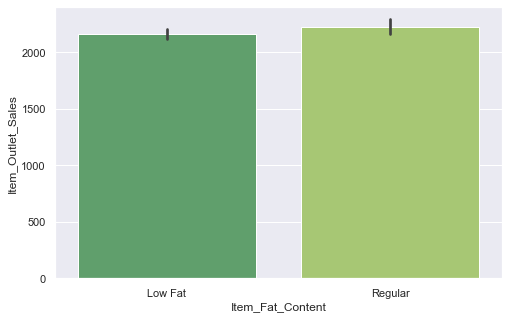

In [45]:
# Bivariate of Item Fat Content to Item Outlet Sales
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train_dataset,palette='summer')

In [46]:
# From the above plot, it appears that both Lof Fat and Regular types are contributing almost equally to the revenue

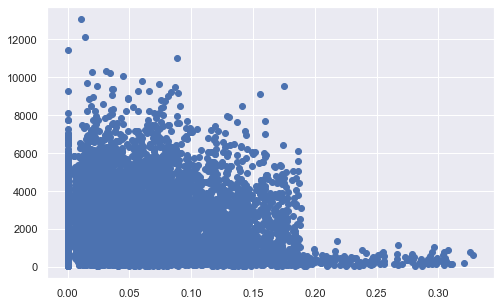

In [47]:
# Bivariate of Item Visibility to Item Outlet Sales
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=train_dataset)

In [48]:
# From the above plot, the observation is that even when the visibility of items is 0 the items are sold.
# This means that consumers choose their own products

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

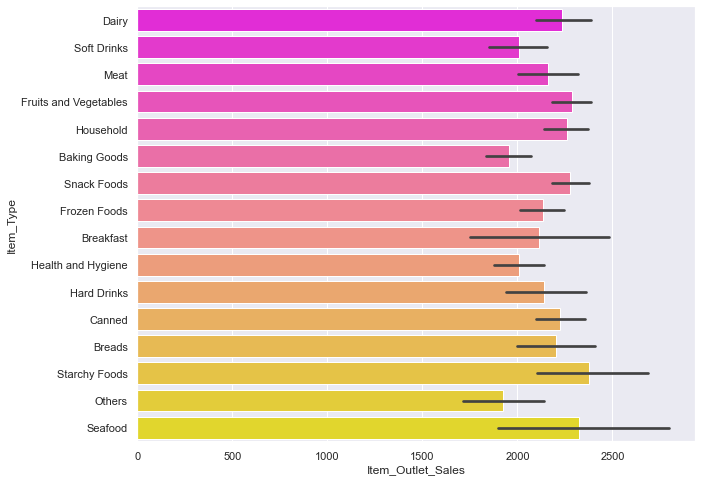

In [49]:
# Bivariate of Item type to Item Outlet Sales
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train_dataset,palette='spring')

In [50]:
# From the above plot, the observation is that though Fruits and Vegetables are more sold, the revenue generation is more
# from seafood.  This means the stores will have to focus more on Seafoods

Text(0, 0.5, 'Item Outlet Sales')

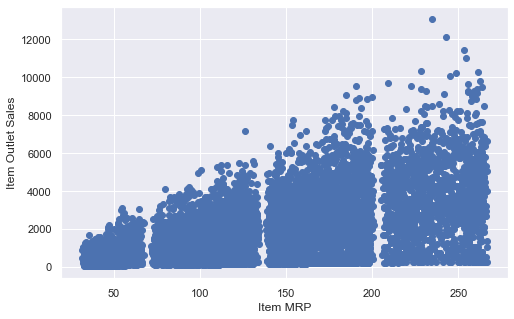

In [51]:
# Bivariate of Item MRP to Item Outlet Sales

plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train_dataset)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

In [52]:
# From the above plot, its quite clear that items with higher MRP are sold maximum

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

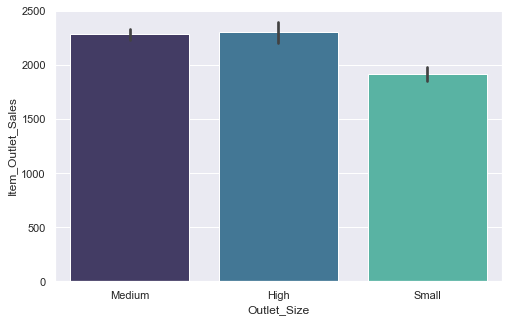

In [53]:
# Bivariate of Outlet Size to Item Outlet Sales
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train_dataset,palette='mako')

In [54]:
# From the above plot, its quite clear that Medium and High size outlets have max revenue generation capability

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

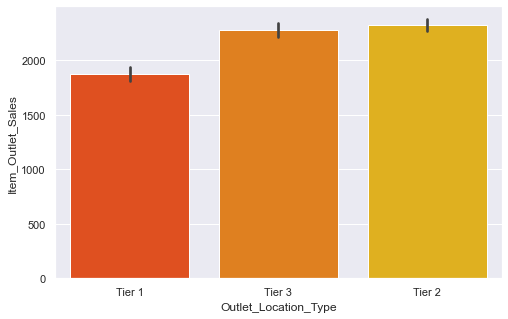

In [55]:
# Bivariate of Outlet location to Item outlet Sales

plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train_dataset,palette='autumn')

In [56]:
# From the above plot, its quite clear that Tier 2 and Tier 3 have more revenue generation capacity

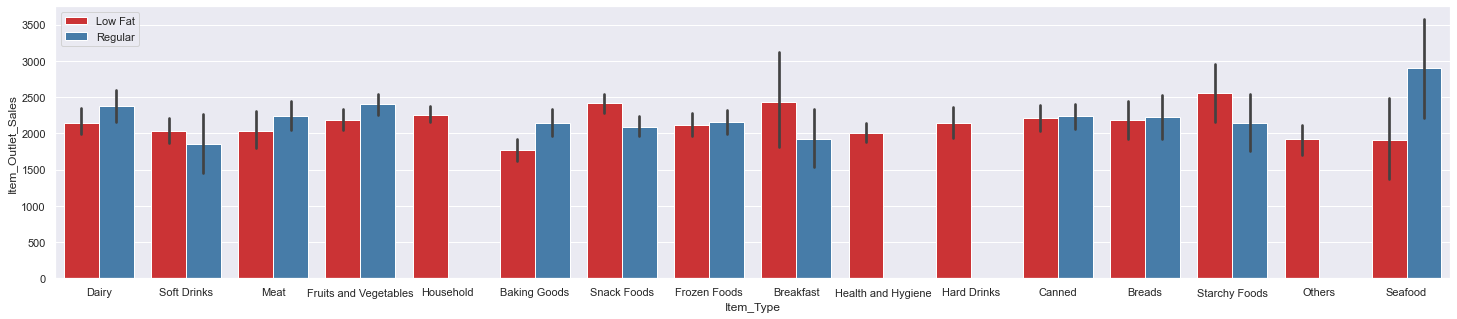

In [57]:
# Lets do the Multivariate analysis

# Multivariate of Item Type by Item Fat Content to Item Output Sales

plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train_dataset,palette='Set1')
plt.legend()

In [58]:
# From the above plot, it appears that Fat and Regular food items derive almost equal revenue

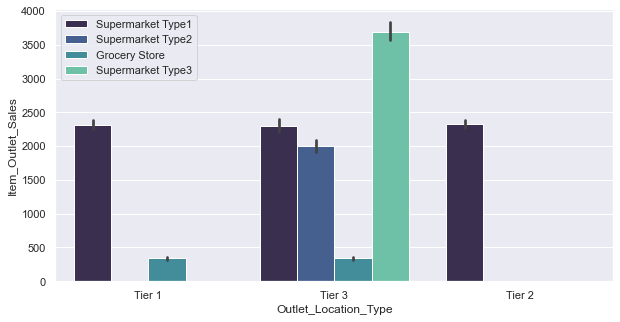

In [59]:
# Multivariate of Outlet Location Type by Outlet Typeto Item Outlet Sales

plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train_dataset,palette='mako')
plt.legend()

In [60]:
# From the above plot, it is clear that even when the item is kept in the shelf and the visibility is 0, the sales is good
# This indicates that customers search for their own products

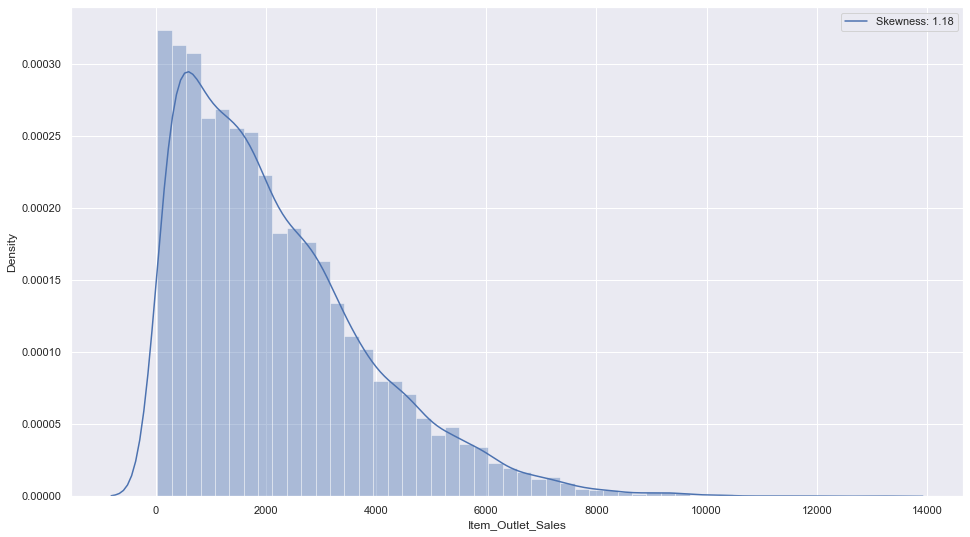

In [61]:
# Lets do the Distplot of the target variable

plt.figure(figsize=(16,9))
bar = sns.distplot(train_dataset['Item_Outlet_Sales'])
bar.legend(["Skewness: {:.2f}".format(train_dataset['Item_Outlet_Sales'].skew())])
plt.show()

In [62]:
# Correlation Matrix
train_dataset_cor = train_dataset.drop(columns='Item_Outlet_Sales')
train_dataset_cor.shape

(8523, 11)

<AxesSubplot:title={'center':'Correlated with SalePrice'}>

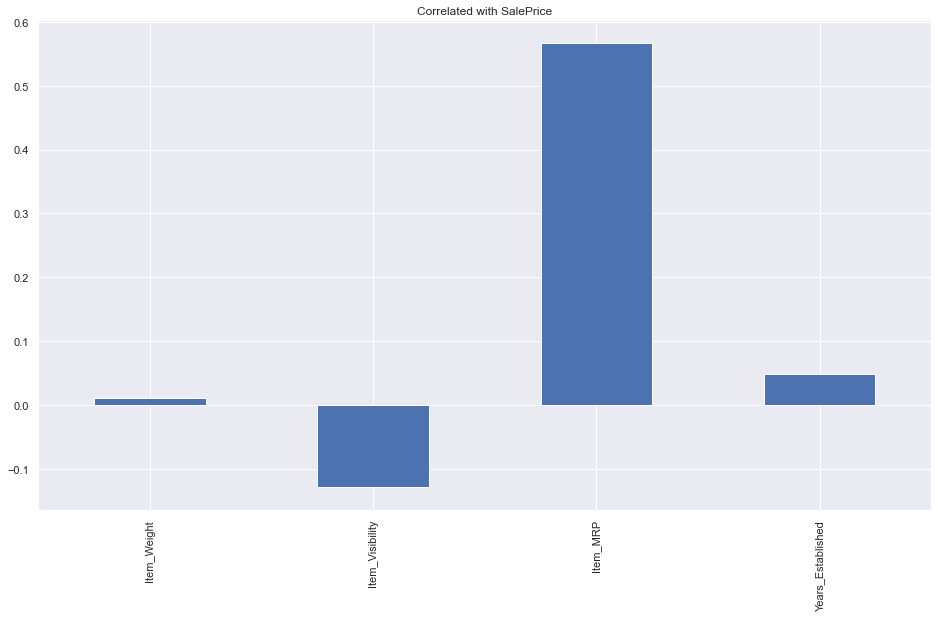

In [63]:
train_dataset_cor.corrwith(train_dataset['Item_Outlet_Sales']).plot.bar(
    figsize=(16,9), title='Correlated with SalePrice', grid=True
)

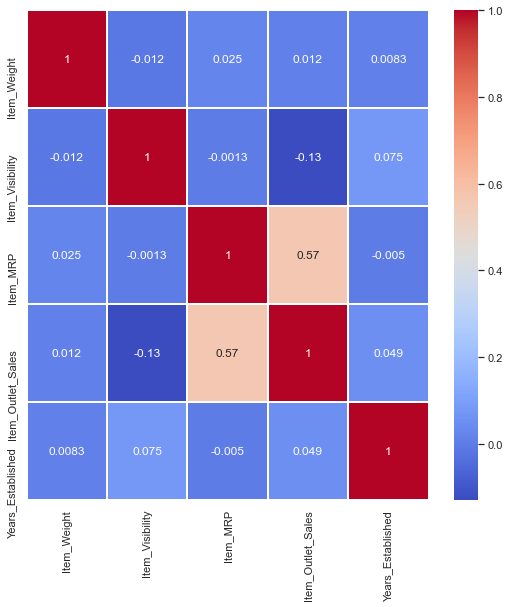

In [64]:
# Heatmap
plt.figure(figsize=(9, 9))
ax = sns.heatmap(data=train_dataset.corr(), cmap='coolwarm', annot=True, linewidths=2)

In [65]:
# Feature Engineering

# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['Outlet_Identifier','Item_Type']

for i in var_mod:
    train_dataset[i] = le.fit_transform(train_dataset[i])
    
train_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,4,249.8092,9,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,14,48.2692,3,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,10,141.6180,9,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.000000,6,182.0950,0,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.000000,9,53.8614,1,High,Tier 3,Supermarket Type1,994.7052,34


In [66]:
# One hot encoding
train_dataset = train_dataset.drop(columns=['Item_Identifier'])
train_dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,9.30,Low Fat,0.016047,4,249.8092,9,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,5.92,Regular,0.019278,14,48.2692,3,Medium,Tier 3,Supermarket Type2,443.4228,12
2,17.50,Low Fat,0.016760,10,141.6180,9,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,19.20,Regular,0.000000,6,182.0950,0,Medium,Tier 3,Grocery Store,732.3800,23
4,8.93,Low Fat,0.000000,9,53.8614,1,High,Tier 3,Supermarket Type1,994.7052,34


In [67]:
from sklearn.preprocessing import OneHotEncoder

train_dataset = pd.get_dummies(data=train_dataset, drop_first=True)
train_dataset.shape

(8523, 15)

In [68]:
train_dataset.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Years_Established,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,249.8092,9,3735.1380,22,0,1,0,0,0,1,0,0
1,5.92,0.019278,14,48.2692,3,443.4228,12,1,1,0,0,1,0,1,0
2,17.50,0.016760,10,141.6180,9,2097.2700,22,0,1,0,0,0,1,0,0
3,19.20,0.000000,6,182.0950,0,732.3800,23,1,1,0,0,1,0,0,0
4,8.93,0.000000,9,53.8614,1,994.7052,34,0,0,0,0,1,1,0,0


In [69]:
# We now proceed to remove the skewness in the data
# From the above graphs and the analysis, it appears that the Item_Visbility variable is highly skewed.
# We need to treat the skewness for better predictions in the models

# We use Log transformation to treat the skewness
#train_dataset['Item_Visibility'] = np.log(train_dataset['Item_Visibility'])
#train_dataset.head()

#Please note that the above skewness is commented since its impacting the performance of the model

In [70]:
# Now lets split the dataset

x = train_dataset.drop(columns='Item_Outlet_Sales')
y = train_dataset['Item_Outlet_Sales']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train.shape

(6818, 14)

In [71]:
y_train.shape

(6818,)

In [72]:
x_test.shape

(1705, 14)

In [73]:
y_test.shape

(1705,)

In [74]:
# Lets do the feature scaling
train_features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']

In [75]:
# Lets build the model now

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRFRegressor
from sklearn.linear_model import Ridge

def cross_val(model_name,model,x,y,cv):
    
    scores = CVS(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')
    


In [76]:
# 1. Multiple Linear Regressor
#ML model
from sklearn.linear_model import LinearRegression

#model
regressor_mlr = LinearRegression()

#fit
regressor_mlr.fit(x_train, y_train)

#predict
y_pred = regressor_mlr.predict(x_test)

#score variables
score_lr_mae = round(MAE(y_test, y_pred),2)
score_lr_mse = round(MSE(y_test, y_pred),2)
score_lr_r2 = round(R2(y_test, y_pred),4)
score_lr_cs  = round(CVS(regressor_mlr, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {score_lr_mae}\n")
print(f" Mean Squared Error: {score_lr_mse}\n")
print(f" R^2 Score: {score_lr_r2}\n")
cross_val(regressor_mlr,LinearRegression(),x,y,5)

 Mean Absolute Error: 851.52

 Mean Squared Error: 1275654.43

 R^2 Score: 0.5642

LinearRegression() Scores:
0.57
0.56
0.55
0.57
0.57
Average LinearRegression() score: 0.5613


In [77]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Linear_Regression.to_csv("Linear Regression.csv")


In [78]:
# 2. Random Forest Regressor

#ML model
from sklearn.ensemble import RandomForestRegressor

#model
regressor_rf = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)

#fit
regressor_rf.fit(x_train, y_train)

#predict
y_pred = regressor_rf.predict(x_test)

#score variables
score_rfr_mae = round(MAE(y_test, y_pred),2)
score_rfr_mse = round(MSE(y_test, y_pred),2)
score_rfr_r2 = round(R2(y_test, y_pred),4)
score_rfr_cs  = round(CVS(regressor_rf, x, y, cv=5).mean(),4)


print(f" Mean Absolute Error: {score_rfr_mae}\n")
print(f" Mean Squared Error: {score_rfr_mse}\n")
print(f" R^2 Score: {score_rfr_r2}\n")
cross_val(regressor_rf,RandomForestRegressor(),x,y,5)

 Mean Absolute Error: 780.11

 Mean Squared Error: 1200066.53

 R^2 Score: 0.59

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.54
0.53
0.56
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5542


In [79]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv") 

In [80]:
# 3. Lasso Regressor

#ML model
from sklearn.linear_model import Lasso

#model
regressor_ls = Lasso(alpha = 0.05)
#fit
regressor_ls.fit(x_train,y_train)

#predict
y_pred = regressor_ls.predict(x_test)

#score variables
score_lr_mae = round(MAE(y_test, y_pred),2)
score_lr_mse = round(MSE(y_test, y_pred),2)
score_lr_r2 = round(R2(y_test, y_pred),4)
score_lr_cs  = round(CVS(regressor_ls, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {score_lr_mae}\n")
print(f" Mean Squared Error: {score_lr_mse}\n")
print(f" R^2 Score: {score_lr_r2}\n")
cross_val(regressor_ls,Lasso(alpha = 0.05),x,y,5)

 Mean Absolute Error: 851.31

 Mean Squared Error: 1275582.84

 R^2 Score: 0.5642

Lasso(alpha=0.05) Scores:
0.57
0.56
0.55
0.57
0.57
Average Lasso(alpha=0.05) score: 0.5613


In [81]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Lasso_Regressor.to_csv("Lasso Regressor.csv")  

In [82]:
# 4. XGBoost Regressor

#ML model
from xgboost import XGBRFRegressor

#model
regressor_xgb = XGBRFRegressor()

#fit
regressor_xgb.fit(x_train, y_train)

#predict
y_pred = regressor_xgb.predict(x_test)

#score variables
score_xgb_mae = round(MAE(y_test, y_pred),2)
score_xgb_mse = round(MSE(y_test, y_pred),2)
score_xgb_r2 = round(R2(y_test, y_pred),4)
score_xgb_cs  = round(CVS(regressor_xgb, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {score_xgb_mae}\n")
print(f" Mean Squared Error: {score_xgb_mse}\n")
print(f" R^2 Score: {score_xgb_r2}\n")
cross_val(regressor_xgb,XGBRFRegressor(alpha = 0.05),x,y,5)

 Mean Absolute Error: 774.61

 Mean Squared Error: 1199975.18

 R^2 Score: 0.59

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None) Scores:
0.61
0.58
0.57
0.6
0.61
Average XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, 

In [83]:
XGBoost_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
XGBoost_Regressor.to_csv("XGBoost Regressor.csv") 

In [84]:
# 5. Ridge Regressor

#ML model
from sklearn.linear_model import Ridge

#model
regressor_rd = Ridge(normalize=True)
#fit
regressor_rd.fit(x_train,y_train)

#predict
y_pred = regressor_ls.predict(x_test)

#score variables
score_rr_mae = round(MAE(y_test, y_pred),2)
score_rr_mse = round(MSE(y_test, y_pred),2)
score_rr_r2 = round(R2(y_test, y_pred),4)
score_rr_cs  = round(CVS(regressor_rd, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {score_rr_mae}\n")
print(f" Mean Squared Error: {score_rr_mse}\n")
print(f" R^2 Score: {score_rr_r2}\n")
cross_val(regressor_rd,Ridge(normalize=True),x,y,5)

 Mean Absolute Error: 851.31

 Mean Squared Error: 1275582.84

 R^2 Score: 0.5642

Ridge(normalize=True) Scores:
0.38
0.38
0.38
0.37
0.38
Average Ridge(normalize=True) score: 0.376


In [85]:
Ridge_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Ridge_Regressor.to_csv("Ridge Regressor.csv")  

In [86]:
# Lets do the conclusion

score_arr_mae = [score_lr_mae,score_rfr_mae,score_lr_mae,score_xgb_mae,score_rr_mae]
score_arr_mse = [score_lr_mse,score_rfr_mse,score_lr_mse,score_xgb_mse,score_rr_mse]
score_arr_r2 = [score_lr_r2,score_rfr_r2,score_lr_r2,score_xgb_r2,score_rr_r2]
score_arr_cs = [score_lr_cs,score_rfr_cs,score_lr_cs,score_xgb_cs,score_rr_cs]

Models = pd.DataFrame({
    'Models': ["Linear Regression","Random Forest Regressor","Lasso Regressor","XGBoost Regressor","Ridge Regressor"],
    'MAE': score_arr_mae, 'MSE': score_arr_mse, 'R^2':score_arr_r2, 'Cross Validation Score':score_arr_cs})
Models.sort_values(by='MAE', ascending=True)

,Models,MAE,MSE,R^2,Cross Validation Score
3,XGBoost Regressor,774.61,1199975.18,0.5900,0.5935
1,Random Forest Regressor,780.11,1200066.53,0.5900,0.5948
0,Linear Regression,851.31,1275582.84,0.5642,0.5613
2,Lasso Regressor,851.31,1275582.84,0.5642,0.5613
4,Ridge Regressor,851.31,1275582.84,0.5642,0.3760


In [87]:
# 1. XGBoost and Random Forest are the best performing models
# 2. MRP has a huge correlation with the outlet sales
